In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

In [6]:
file = open("Files/CR-shortanswer.csv")
reader_contents = pd.read_csv(file, header = 0)

Collected issue reports from questionnaire Q3-Q8 (SE) and built word clouds. 

In [7]:
issues = reader_contents[["Q13", "Q4", "Q6", "Q7", "Q8"]]
issues = issues[2:]

Collected suggestions and built word clouds from Q9 (SE).

In [8]:
suggestions = reader_contents[["Q9"]]
suggestions = suggestions[2:]

Collected good features from the CR and built a word cloud from Q10 (SE).

In [9]:
good_features = reader_contents[["Q10"]]
good_features = good_features[2:]

In [10]:
def word_cloud(lis):
    information_store = []
    
    for i in lis:
        for q in lis[i]:
            if pd.isna(q) != True:
                information_store.append([q])
    text = ""
    
    for row in information_store:
        for word in row :
            text = text + " " + word
    
    return text

In [11]:
wordcloud_1 = WordCloud(width=480, height=480, background_color="pink").generate(word_cloud(issues))
wordcloud_2 = WordCloud(width=480, height=480, background_color="green").generate(word_cloud(suggestions))
wordcloud_3 = WordCloud(width=480, height=480, background_color="black").generate(word_cloud(good_features))

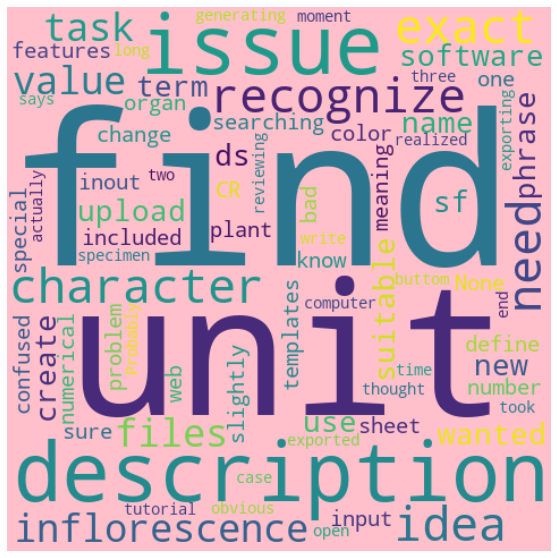

In [12]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_1, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [13]:
plt.savefig(os.path.join('Pics/wc1.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

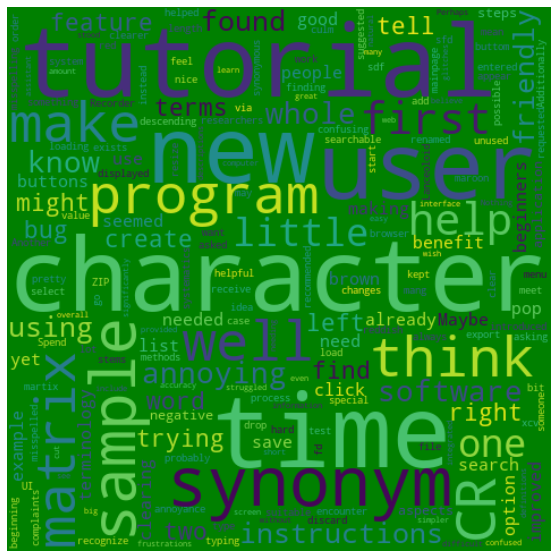

In [14]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_2, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [15]:
plt.savefig(os.path.join('Pics/wc2.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

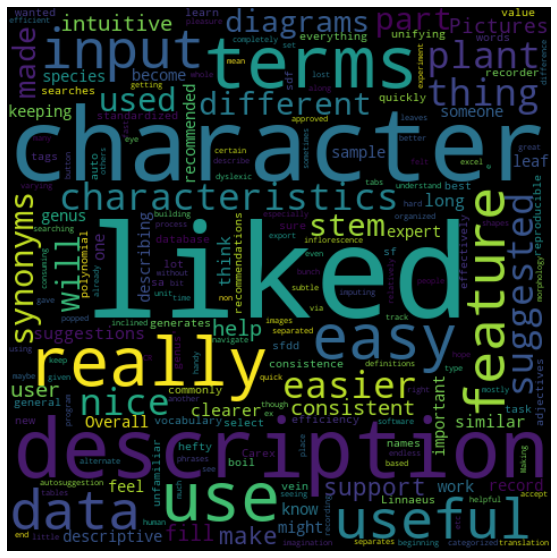

In [16]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_3, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [17]:
plt.savefig(os.path.join('Pics/wc3.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

Words will be used in the research.

In [18]:
# Count excel words
def excel_word_detach():
    # read excel files and fill NA values as "of", trans interger to string
    folder = os.listdir("Experiment Files")
    folder.remove('.DS_Store')
    d={}

    for i in folder:
        test = pd.read_excel("Experiment Files/" + i + "/" + i + ".xlsx").fillna("of").astype(str)
        # remove stopwords (e.g., of, the, or) and create empty list to store values
        remove = ["of", "the", "or"]
        store = []

        # store non-na value into store
        for i in test:
            for p in test[i]:
                if p not in remove:
                    store.append(p.split())

        # store non-stopwords value into word_count
        word_count = []
        for q in store:
            for c in q:
                if c not in remove:
                    word_count.append(c)

        # store and count value, store those value and words into dictionary d
        for x in word_count:
            if not x in d:
                d[x]=1
            else:
                d[x]=d[x]+1
    return d

In [22]:
orders = excel_word_detach()
sort_orders = dict(sorted(orders.items(), key=lambda x: x[1], reverse=False))

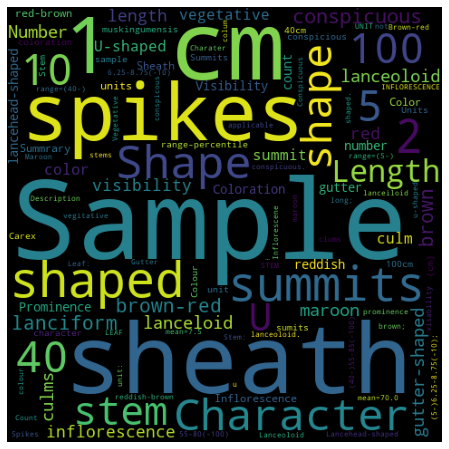

In [27]:
wordcloud_Excel = WordCloud(width=480, height=480).generate_from_frequencies(sort_orders)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_Excel)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
